# Assignment 1: Exploratory Data Analysis
## Group 22
- Natasa Bolic (300241734)
- Brent Palmer (300193610)
## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 1: The Influence of Demographics on Digital Consumption

### Dataset Description
**Url:** https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data <br>
**Name:** German Credit Risk <br>
**Author:** UCI Machine Learning <br>
**Purpose:** The dataset was originally created with the intent of classifying people as good or bad credit risks based on specified attributes.<br>
**Shape:** There are 1000 rows and 10 columns. (1000, 10)<br>
**Features:** Supplementary information regarding features retrieved from https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data
- `Unnamed: 0` (categorical): A unique id assigned to each person who took credit.
- `Age` (numerical): The age of the person.
- `Sex` (categorical): The sex of the person (male or female).
- `Job` (categorical): The category of job of the person.
    - 0: Unskilled and non-resident
    - 1: Unskilled and resident
    - 2: Skilled
    - 3: Highly skilled
- `Housing` (categorical): Ownership status of the person's place of residence.
    - own: They own their home
    - rent: They rent their home
    - free: The person does not pay for their residence (friends and family, employer-provided, government-assisted, etc.)
- `Saving accounts` (categorical): How much money the person has in saving accounts.
    - litte: x < 100 Deutschmark (DM)
    - moderate: 100 <= x < 500 DM
    - quite rich: 500 <= x < 1000 DM
    - rich: x >= 1000 DM
    - NaN: unknown or no savings account
- `Checking account` (categorical): How much money the person has in checking accounts.
    - little: x < 0 DM
    - moderate: 0 <= x <  200 DM
    - rich: x >= 200 DM / salary assignments for at least 1 year
    - NaN: no checking account
- `Credit amount` (numerical): The amount of credit taken from the bank.
- `Duration` (numerical): The duration in months to pay back the loan.
- `Purpose` (categorical): What the credit was taken for.

**Redundancy:** There is no redundancy in the dataset. Each row has a unique ID in the first column. To check if there are any duplicate rows excluding the ID, you can provide the `.duplicated()` method all of the other columns as follows: `data.duplicated(subset=data.columns[1:]).any()`. This will return `True` if any rows are duplicated. Since it returns `False`, there is no redundancy. Note that none of the columns are synonymous.<br>
**Missing Values:** Yes, there are missing values. Running `data.isnull().sum()` reveals that there are 183 occurrences of missing data for savings accounts, and there are 394 occurrences of missing data for checking accounts.

## Dataset Overview (in Code)

### Extract the Dataset (Mobile Device Usage and User Behaviour)

In [2]:
url = "https://raw.githubusercontent.com/BrentMRPalmer/credit-data/refs/heads/main/german_credit_data.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
data.shape

(1000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [6]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
data.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64

### Checking for Missing Values
https://www.atlassian.com/data/notebook/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

In [8]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

### Checking for Duplicates
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

In [9]:
data.duplicated(subset=data.columns[1:]).any()

False

## Insights

### **Insight 1 (r1):** The credit amounts consist primarily of low quantities, with fewer large credit amounts.
**Analysis:** This is a univariate analysis of numerical data, using a simple histogram to visualize the dispersion of credit amounts. The Freedman-Diaconis rule was used to determine the optimal number of bins. The histogram is heavily right-skewed, demonstrating that most credit amounts are low values, while a smaller number of loans involve significantly larger amounts.<br>
**Resources:** <br>
Freedman-Diaconis: https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram <br>
Gridlines: https://www.w3schools.com/python/matplotlib_grid.asp <br>
Histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html

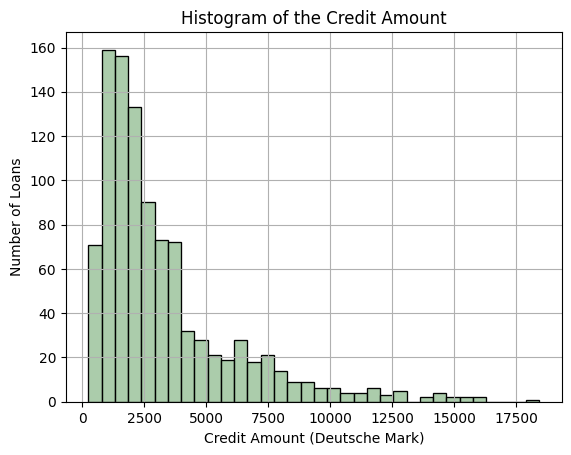

In [70]:
# Use Freedman-Diaconis rule to determine number of bins
x_axis = "Credit amount"
iqr = np.percentile(data[x_axis], 75) - np.percentile(data[x_axis], 25)
bin_width = 2 * iqr / (len(data[x_axis]) ** (1/3))
num_bins = int((data[x_axis].max() - data[x_axis].min()) / bin_width)

# Create the histogram of Credit Amount
sns.histplot(data=data, x=x_axis, bins=num_bins, color="darkseagreen")

# Label the histogram
plt.xlabel(x_axis.title() + " (Deutsche Mark)")
plt.ylabel('Number of Loans')
plt.title('Histogram of the ' + x_axis.title())
plt.grid()

# Display plot
plt.show()

### **Insight 2 (r2):** The distribution of credit purposes is very unbalanced, with `car`, `radio/TV`, and `furniture/equipment` being the most common, and `domestic appliances` and `vacation/others` being the least common.
**Analysis:** This is a univariate analysis of categorical data, using a countplot to visualize the frequency distribution of credit purposes. The categories are ordered by frequency in ascending order to improve readability. The countplot illustrates that there is a significant variation in counts of each purpose, with `car`, `radio/TV`, and `furniture/equipment` being the most common, and `domestic appliances` and `vacation/others` being the least common.<br>
**References:** <br>
Ordering Countplot: https://www.statology.org/seaborn-countplot-order/ <br>
Countplot: https://seaborn.pydata.org/generated/seaborn.countplot.html

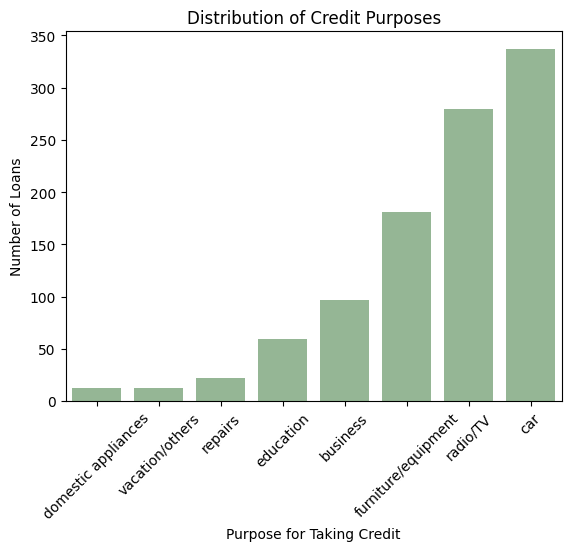

In [11]:
# Sorted order of credit purposes based on count
x_axis = "Purpose"
sorted_order = data[x_axis].value_counts(ascending=True).index

# Create the countplot
sns.countplot(data=data, x=x_axis, color="darkseagreen", order=sorted_order)

# Label the countplot
plt.xticks(rotation=45)
plt.xlabel('Purpose for Taking Credit')
plt.ylabel('Number of Loans')
plt.title('Distribution of Credit Purposes')

# Display plot
plt.show()

### **Insight 3 (r3):** The majority of the loans were taken for a long-term duration (over one year).
**Analysis:** This is a univariate analysis of categorical data, using a grouped-data countplot to visualize the frequency distribution of credit duration. The credit duration is grouped into two categories, `Short-term (12 Months or Less)` and `Long-term (More Than 12 Months)`. The reason for this grouping is to follow accounting standards; in accounting, liabilities are classified as `short-term` liabilities which are due within a year, and `long-term` liabilities which are due in over a year. This makes the data easier to analyze for people with a background in business. The `short-term` is ordered before `long-term`, since it has a smaller term. The grouped-data countplot reveals that the majority of credit was taken for `long-term` durations.<br>
**Resources:** <br>
Grouping data: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html <br>
Long-term Liabilities: https://www.investopedia.com/terms/l/longtermliabilities.asp#:~:text=Long%2Dterm%20liabilities%20are%20typically,due%20within%20the%20current%20year.

In [12]:
# Define a function to return a group based on duration
def group_duration(duration):
    if duration <= 12:
        return 'Short-term (12 Months or Less)'
    else:
        return 'Long-term (More Than 12 Months)'

# Create a new feature containing the grouped duration
data['grouped_duration'] = data['Duration'].apply(group_duration)
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,grouped_duration
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,Short-term (12 Months or Less)
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,Long-term (More Than 12 Months)
2,2,49,male,1,own,little,NaN,2096,12,education,Short-term (12 Months or Less)
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,Long-term (More Than 12 Months)
4,4,53,male,2,free,little,little,4870,24,car,Long-term (More Than 12 Months)


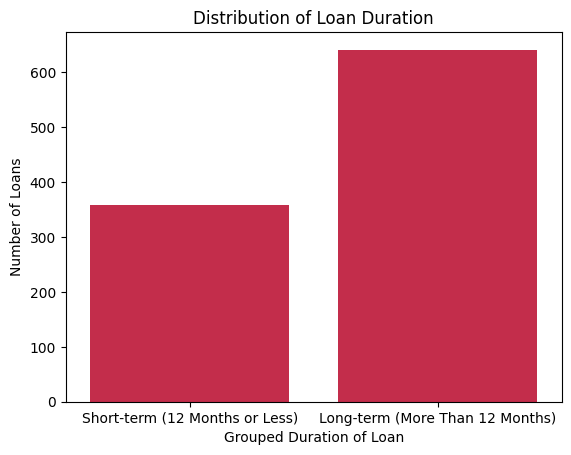

In [13]:
# Set the order of the categories
order = ['Short-term (12 Months or Less)', 'Long-term (More Than 12 Months)']

# Create the countplot
sns.countplot(data=data, x="grouped_duration", order=order, color="crimson")

# Label the countplot
plt.xlabel('Grouped Duration of Loan')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Duration')

# Display plot
plt.show()

### **Insight 4 (r4):** The proportion of homeownership does not significantly vary by job skill level.
**Analysis:** This is a bivariate analysis of categorical/categorical two-value data, using a barplot to compare grouped job level against grouped home ownership. First, the job skill level is partitioned into two sets, `Unskilled (Non-Resident & Resident)` and `Skilled & Highly Skilled`. In brief, the two categories are unskilled workers and skilled workers. These brief category names were not used, to distinguish between the `Skilled & Highly Skilled` grouping and the original `Skilled` category. Secondly, the home ownership is grouped into two sets, `Home Owner` and `Not Home Owner`. The goal is to determine if there is a relationship between job skill level and whether or not someone owns a home.<br>
In the dataset, there are a lot more skilled workers than unskilled workers. Since we want to compare the proportion of home ownership within each skill level, it would be useful to normalize the values to avoid being influenced by differing group sizes. A new DataFrame with the proportions as a new feature is created. Ultimately, the barplot reveals that the proportion of homeownership does not significantly vary by job skill level. <br>
**References:** <br>
Normalizing countplot: https://www.geeksforgeeks.org/normalizing-seaborn-countplot-with-multiple-categorical-variables/ <br>
Moving legend: https://how2matplotlib.com/bbox_to_anchor.html#google_vignette <br>
Barplot: https://seaborn.pydata.org/generated/seaborn.barplot.html

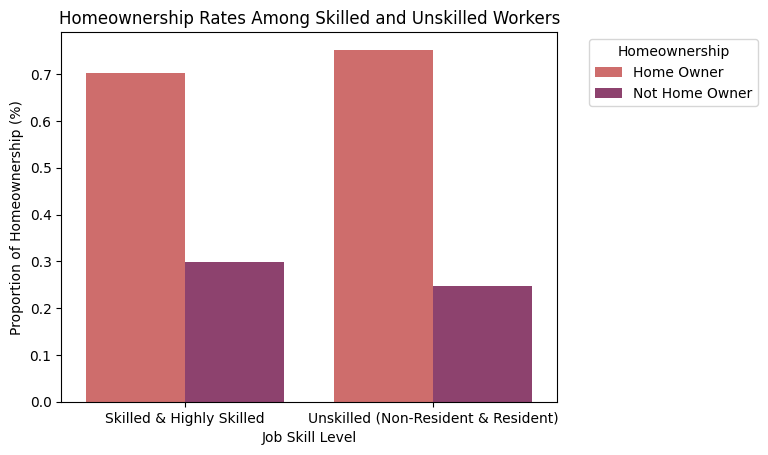

In [76]:
# Define a function to return a group based on job skill
def group_job(job):
    if job <= 1:
        return 'Unskilled (Non-Resident & Resident)'
    else:
        return 'Skilled & Highly Skilled'

# Create a new feature containing the grouped job skill
data['grouped_job'] = data['Job'].apply(group_job)

# Define a function to return a group based on homeownership
def group_housing(housing):
    if housing == "own":
        return 'Home Owner'
    else:
        return 'Not Home Owner'

# Create a new feature containing the grouped housing
data['grouped_housing'] = data['Housing'].apply(group_housing)

# Group by grouped_job and grouped_housing and count how many times each combination appears
grouped_data = data.groupby(['grouped_job', 'grouped_housing']).size().reset_index(name="counts")

# Sums the total count for each grouped_job
grouped_data['total'] = grouped_data.groupby('grouped_job')['counts'].transform('sum')

# Divides the count of each grouped_housing category by total count for that grouped_job
grouped_data['proportion'] = grouped_data['counts'] / grouped_data['total']

# Create a barplot comparing the binary categorical variables
sns.barplot(data=grouped_data, x="grouped_job", y="proportion", hue="grouped_housing", palette="flare")

# Label the countplot
plt.xlabel('Job Skill Level')
plt.ylabel('Proportion of Homeownership (%)')
plt.title('Homeownership Rates Among Skilled and Unskilled Workers')
plt.legend(title="Homeownership", loc='upper left', bbox_to_anchor=(1.05,1))  

# Display plot
plt.show()

### **Insight 5 (r5):** Most people have a `little` savings account balance, and those with a `little` savings account balance are most likely to have a `little` checking account balance, whereas those with `moderate`, `quite rich`, or `rich` savings balance are most likely to have a `moderate` checkings balance.
**Analysis:** This is a bivariate analysis of categorical/categorical data, using a countplot to compare savings account balances with checking account balances. The categories for both savings accounts and checking accounts are ordered by increasing balance. Notably, most people have a `little` savings account balance. People with a `little` savings account balance are most likely to have a `little` checking account balance, whereas those with `moderate`, `quite rich`, or `rich` savings balance are most likely to have a `moderate` checkings balance.<br>

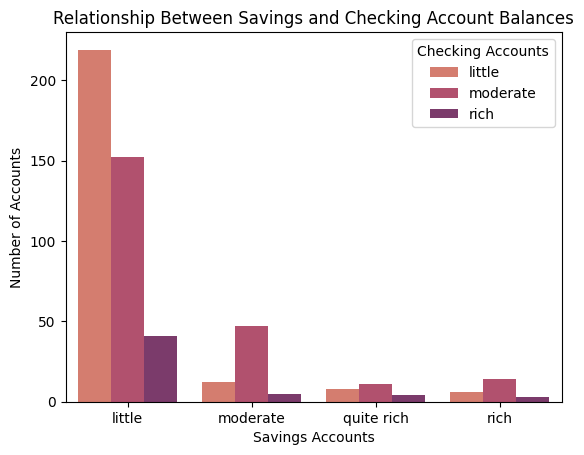

In [30]:
# Set the order of the checking accounts in terms of amount
hue_order = ['little', 'moderate', 'rich']

# Set the order of the savings accounts in terms of amount
order = ['little', 'moderate', 'quite rich', 'rich']

# Create a countplot comparing the savings accounts to the checking accounts
sns.countplot(x="Saving accounts", hue="Checking account", data = data, order=order, hue_order=hue_order, palette="flare")

# Label the countplot
plt.xlabel('Savings Accounts')
plt.ylabel('Number of Accounts')
plt.title('Relationship Between Savings and Checking Account Balances')
plt.legend(title="Checking Accounts")  

# Display plot
plt.show()

### **Insight 6 (r6):** There is a strong positive correlation between credit amount and loan duration.
**Analysis:** This is a bivariate analysis of numerical/numerical data, using a scatterplot to compare credit amount with loan duration. A regplot is used as a specialized scatterplot that includes a regression line. The Pearson correlation coefficient is also computed and displayed on the graph to measure linear correlation. The regplot and Pearson correlation demonstrate that there is a strong positive correlation between credit amount and loan duration.<br>
**References:** <br>
Pearson Correlation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html<br>
Interpreting Pearson: https://www.scribbr.com/statistics/pearson-correlation-coefficient/ <br>
Regplot: https://seaborn.pydata.org/generated/seaborn.regplot.html <br>
Plot text: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

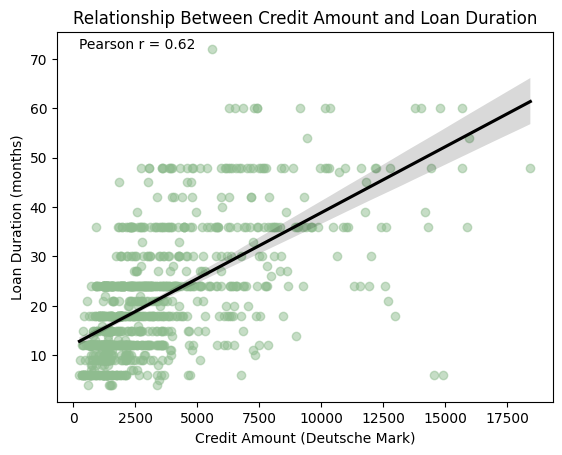

In [77]:
# Create a regplot comparing credit amount with loan duration
sns.regplot(data=data, x="Credit amount", y="Duration", scatter_kws={"color": "darkseagreen", "alpha": 0.5}, line_kws={"color": "black"})

# Calculate the Pearson correlation coefficient
pearson_correlation = data['Duration'].corr(data['Credit amount'])

# Display the Pearson correlation coefficient on the graph
plt.text(
    x=data["Credit amount"].min(),
    y=data["Duration"].max(),
    s=f"Pearson r = {pearson_correlation:.2f}",
    fontsize=10
)

# Label the regplot
plt.xlabel('Credit Amount (Deutsche Mark)')
plt.ylabel('Loan Duration (months)')
plt.title('Relationship Between Credit Amount and Loan Duration')

# Diplay plot
plt.show()

### **Insight 7 (r7):** Skilled workers take out higher credit amounts than unskilled workers.
**Analysis:** This is a bivariate analysis of numerical/categorical data, using a boxplot to compare grouped job skill level with credit amount. The job skill level is categorized into two sets, `Unskilled (Non-Resident & Resident)` and `Skilled & Highly Skilled`. In brief, the two categories are unskilled workers and skilled workers. These brief category names were not used, to distinguish between the `Skilled & Highly Skilled` grouping and the original `Skilled` category. Ultimately, the boxplot shows that skilled workers take larger credit amounts than unskilled workers. <br>
**References:** <br>
boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

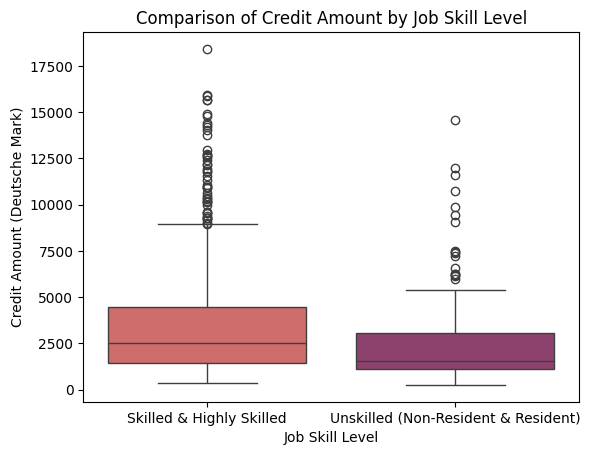

In [73]:
# Create a boxplot comparing the grouped job skill level (from insight 4) with credit amount
sns.boxplot(data=data, x="grouped_job", y="Credit amount", hue="grouped_job", palette="flare", legend=False)

# Label the plot
plt.xlabel('Job Skill Level')
plt.ylabel('Credit Amount (Deutsche Mark)')
plt.title('Comparison of Credit Amount by Job Skill Level')

# Display plot
plt.show()

### **Insight 8 (r7):** Individuals with a `little` or `moderate` savings account balances tend to take out a wider range of credit amounts, demonstrating greater variability and outliers, however the median credit amount remains consistent across savings account levels.
**Analysis:** This is a bivariate analysis of numerical/categorical data, using a boxplot to compare savings account balance with credit amount. The boxplots are ordered by increasing savings account balance to improve readability. The median credit amount and interquartile range are similar across savings account categories, however, those with `little` and `moderate` savings account balances show wider dispersion with more outliers and larger Q3 values. Those with `quite rich` and `rich` savings account balances tend to avoid large credit amounts.

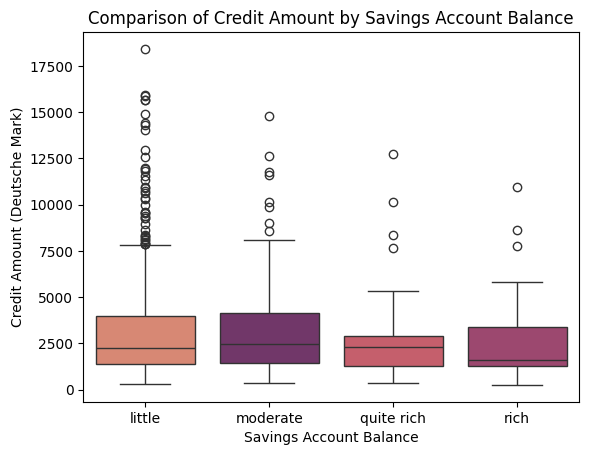

In [74]:
# Set the order of the savings accounts in terms of amount
order = ['little', 'moderate', 'quite rich', 'rich']

# Create a boxplot comparing the savings account balance with credit amount
sns.boxplot(data=data, x="Saving accounts", y="Credit amount", hue="Saving accounts", order=order, palette="flare", legend=False)

# Label the plot
plt.xlabel('Savings Account Balance')
plt.ylabel('Credit Amount (Deutsche Mark)')
plt.title('Comparison of Credit Amount by Savings Account Balance')

# Display plot
plt.show()

### **Insight 9 (r4):** Men have a slightly higher proportion of home ownership than women.
**Analysis:** This is a bivariate analysis of categorical/categorical two-value data, using a barplot to compare Sex against grouped home ownership. The home ownership is grouped into two sets, Home Owner and Not Home Owner. The goal is to determine if there is a relationship between Sex and whether or not someone owns a home.
In the dataset, there are a lot more men than women. Since we want to compare the proportion of home ownership by Sex, it would be useful to normalize the values to avoid being influenced by differing group sizes. A new DataFrame with the proportions as a new feature is created. Ultimately, the barplot reveals that men have a slightly higher proportion of home ownership than women.<br>

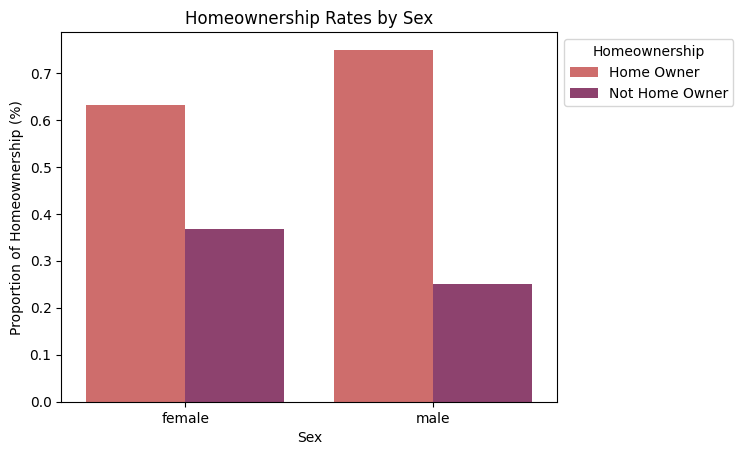

In [75]:
# Groups by Sex and grouped_housing and counts how many times each combination appears
grouped_data = data.groupby(['Sex', 'grouped_housing']).size().reset_index(name="counts")

# Sums the total count for each Sex
grouped_data['total'] = grouped_data.groupby('Sex')['counts'].transform('sum')

# Divides the count of each grouped_housing category by total count for that Sex
grouped_data['proportion'] = grouped_data['counts'] / grouped_data['total']

# Create a barplot comparing the binary categorical variables
sns.barplot(data=grouped_data, x="Sex", y="proportion", hue="grouped_housing", palette="flare")

# Label the countplot
plt.xlabel('Sex')
plt.ylabel('Proportion of Homeownership (%)')
plt.title('Homeownership Rates by Sex')
plt.legend(title="Homeownership", loc='upper left', bbox_to_anchor=(1,1))  

# Display plot
plt.show()

### **Insight 10 (r7):** The average age of those with `Lower Savings` is lower than the average age of those with `Higher Savings`.
**Analysis:** This is a bivariate analysis of numerical/categorical data, using a barplot to compare average age by grouped savings account balance. The savings are grouped into two categories. The first category, `Lower Savings`, includes `little` and `moderate` categories. The second category, `Higher Savings`, includes `quite rich` and `rich` categories. This grouping simplifies analysis. The bars are ordered in increasing order for improved readability. The barplot reveals that the average age of those with `Lower Savings` is lower than the average age of those with `Higher Savings`.<br>
**References:** <br>
Barplot: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

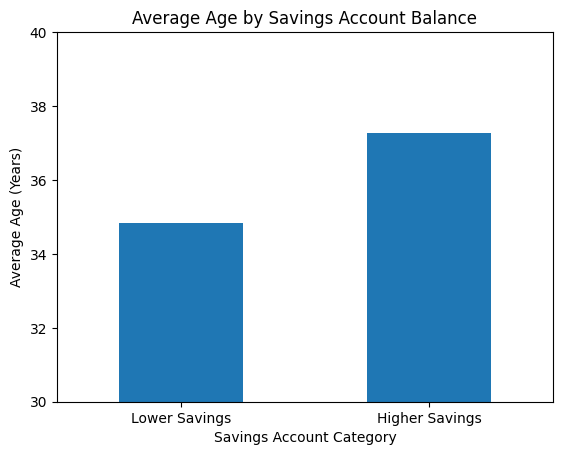

In [65]:
# Define a function to return a group based on savings amount
def group_savings(savings):
    if savings == "little" or savings == "moderate":
        return 'Lower Savings'
    else:
        return 'Higher Savings'

# Create a new feature containing the grouped savings
data['grouped_savings'] = data['Saving accounts'].apply(group_savings)

# Group by savings and compute the mean age
grouped_by_savings = data.groupby('grouped_savings')['Age'].agg(['mean'])

# Define order
order = ["Lower Savings", "Higher Savings"]

# Reorder the DataFrame based on the predefined order
grouped_by_savings = grouped_by_savings.reindex(order)

# Plot the sorted values in a bar plot
grouped_by_savings.plot.bar(ylim=(30,40), legend=False)
plt.xlabel('Savings Account Category')
plt.ylabel('Average Age (Years)')
plt.title('Average Age by Savings Account Balance')
plt.xticks(rotation=0)

# Display plot
plt.show()